In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## running the model

In [3]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 100, 'do_adam': False, 'lr': 0.0065, 'momentum': 0.48, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'fullsize': 350, 'crop': 315, 'size': 280, 'mean': 0.36, 'std': 0.3, 'conv1_dim': 8, 'conv1_kernel_size': 9, 'conv2_dim': 8, 'conv2_kernel_size': 9, 'stride1': 4, 'stride2': 4, 'dimension': 25, 'verbose': 1}


In [4]:
!ls -l {path}
!rm {path}

-rw-r--r--  1 laurentperrinet  staff  342213 Jun 21 08:58 _Regard.pt


In [5]:
from Regard import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
cuda? False
Found 799 sample images;  640  to train 159 to test
Training model...


	Train Epoch: 1 [0/640 (0%)]	Loss: 1.392393
	Train Epoch: 1 [160/640 (25%)]	Loss: 1.365818
	Train Epoch: 1 [320/640 (50%)]	Loss: 1.356132
	Train Epoch: 1 [480/640 (75%)]	Loss: 1.366108
	Train Epoch: 2 [0/640 (0%)]	Loss: 1.229101
	Train Epoch: 2 [160/640 (25%)]	Loss: 1.229778
	Train Epoch: 2 [320/640 (50%)]	Loss: 1.332763
	Train Epoch: 2 [480/640 (75%)]	Loss: 1.205768
	Train Epoch: 3 [0/640 (0%)]	Loss: 1.195765
	Train Epoch: 3 [160/640 (25%)]	Loss: 1.364876
	Train Epoch: 3 [320/640 (50%)]	Loss: 1.476704
	Train Epoch: 3 [480/640 (75%)]	Loss: 1.192806
	Train Epoch: 4 [0/640 (0%)]	Loss: 1.173791
	Train Epoch: 4 [160/640 (25%)]	Loss: 1.109822
	Train Epoch: 4 [320/640 (50%)]	Loss: 1.053084
	Train Epoch: 4 [480/640 (75%)]	Loss: 0.932175
	Train Epoch: 5 [0/640 (0%)]	Loss: 0.901929
	Train Epoch: 5 [160/640 (25%)]	Loss: 0.975405
	Train Epoch: 5 [320/640 (50%)]	Loss: 1.005149
	Train Epoch: 5 [480/640 (75%)]	Loss: 1.129617
	Train Epoch: 6 [0/640 (0%)]	Loss: 0.948295
	Train Epoch: 6 [160/640 (25%)]

	Train Epoch: 44 [480/640 (75%)]	Loss: 0.002693
	Train Epoch: 45 [0/640 (0%)]	Loss: 0.000028
	Train Epoch: 45 [160/640 (25%)]	Loss: 0.001003
	Train Epoch: 45 [320/640 (50%)]	Loss: 0.000737
	Train Epoch: 45 [480/640 (75%)]	Loss: 0.001077
	Train Epoch: 46 [0/640 (0%)]	Loss: 0.000484
	Train Epoch: 46 [160/640 (25%)]	Loss: 0.000652
	Train Epoch: 46 [320/640 (50%)]	Loss: 0.000419
	Train Epoch: 46 [480/640 (75%)]	Loss: 0.000095
	Train Epoch: 47 [0/640 (0%)]	Loss: 0.002460
	Train Epoch: 47 [160/640 (25%)]	Loss: 0.001975
	Train Epoch: 47 [320/640 (50%)]	Loss: 0.000253
	Train Epoch: 47 [480/640 (75%)]	Loss: 0.000509
	Train Epoch: 48 [0/640 (0%)]	Loss: 0.001077
	Train Epoch: 48 [160/640 (25%)]	Loss: 0.000480
	Train Epoch: 48 [320/640 (50%)]	Loss: 0.000320
	Train Epoch: 48 [480/640 (75%)]	Loss: 0.000176
	Train Epoch: 49 [0/640 (0%)]	Loss: 0.002026
	Train Epoch: 49 [160/640 (25%)]	Loss: 0.000625
	Train Epoch: 49 [320/640 (50%)]	Loss: 0.000120
	Train Epoch: 49 [480/640 (75%)]	Loss: 0.000078
	Train 

	Train Epoch: 88 [160/640 (25%)]	Loss: 0.000789
	Train Epoch: 88 [320/640 (50%)]	Loss: 0.000154
	Train Epoch: 88 [480/640 (75%)]	Loss: 0.000597
	Train Epoch: 89 [0/640 (0%)]	Loss: 0.000087
	Train Epoch: 89 [160/640 (25%)]	Loss: 0.000055
	Train Epoch: 89 [320/640 (50%)]	Loss: 0.000331
	Train Epoch: 89 [480/640 (75%)]	Loss: 0.000148
	Train Epoch: 90 [0/640 (0%)]	Loss: 0.000197
	Train Epoch: 90 [160/640 (25%)]	Loss: 0.000097
	Train Epoch: 90 [320/640 (50%)]	Loss: 0.000121
	Train Epoch: 90 [480/640 (75%)]	Loss: 0.000190
	Train Epoch: 91 [0/640 (0%)]	Loss: 0.000075
	Train Epoch: 91 [160/640 (25%)]	Loss: 0.000237
	Train Epoch: 91 [320/640 (50%)]	Loss: 0.000004
	Train Epoch: 91 [480/640 (75%)]	Loss: 0.000546
	Train Epoch: 92 [0/640 (0%)]	Loss: 0.000138
	Train Epoch: 92 [160/640 (25%)]	Loss: 0.000085
	Train Epoch: 92 [320/640 (50%)]	Loss: 0.000015
	Train Epoch: 92 [480/640 (75%)]	Loss: 0.000594
	Train Epoch: 93 [0/640 (0%)]	Loss: 0.000206
	Train Epoch: 93 [160/640 (25%)]	Loss: 0.000690
	Train 

## testing the model

In [6]:
Accuracy = ml.test()


Test set: Average loss: 0.1100, Accuracy: 158/159 (99%)



target:blink
pred  :right


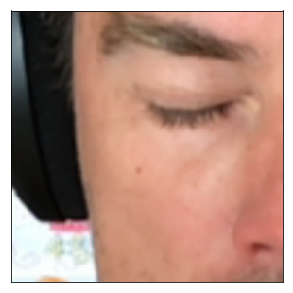

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

for data, labels in ml.dataset.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 


## cross-validation

Test set: Final Accuracy: 99.371%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 95.597%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 95.597%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 98.742%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 97.484%
Test set: Fina

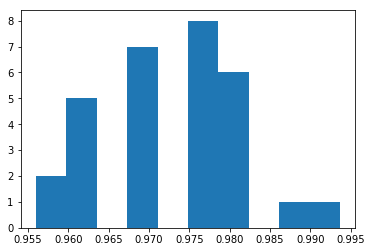

In [8]:
Accuracy = []
for _ in range(30):
    args = init(verbose=0, log_interval=0, seed=42+_)
    ml = ML(args)
    ml.main()
    Accuracy.append(ml.test())
print(Accuracy)

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(Accuracy, bins=7) 

plt.show() 